<a href="https://colab.research.google.com/github/apoorvaproject27-ctrl/apoorvaproject3/blob/main/Project3_apoorva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pandas numpy scikit-learn shap matplotlib seaborn imbalanced-learn


In [ ]:
import pandas as pd

# Path to your dataset
file_path = '/content/drive/MyDrive/Project3/dset3.csv'

# Load CSV
df = pd.read_csv(file_path)

# Quick look
print(df.head())
print(df.columns.tolist())


        Image Index  Follow-up #  Patient ID Patient Age Patient Gender  \
0  00000001_000.png            0           1        058Y              M   
1  00000001_001.png            1           1        058Y              M   
2  00000001_002.png            2           1        058Y              M   
3  00000002_000.png            0           2        081Y              M   
4  00000003_000.png            0           3        081Y              F   

  View Position  Cardiomegaly  Emphysema  Effusion  Hernia  ...  Mass  Nodule  \
0            PA           1.0        0.0       0.0     0.0  ...   0.0     0.0   
1            PA           1.0        1.0       0.0     0.0  ...   0.0     0.0   
2            PA           1.0        0.0       1.0     0.0  ...   0.0     0.0   
3            PA           0.0        0.0       0.0     0.0  ...   0.0     0.0   
4            PA           0.0        0.0       0.0     1.0  ...   0.0     0.0   

   Atelectasis  Pneumothorax  Pleural_Thickening  Pneumonia  F

In [ ]:
def age_to_years(age_str):
    if pd.isna(age_str):
        return None
    age_str = str(age_str).strip()
    if age_str.endswith('Y'):
        return float(age_str.replace('Y',''))
    elif age_str.endswith('M'):
        return float(age_str.replace('M','')) / 12
    else:
        try:
            return float(age_str)
        except:
            return None

df['Patient Age'] = df['Patient Age'].apply(age_to_years)


In [ ]:
metadata_cols = ['Image Index', 'Follow-up #', 'Patient ID', 'fold']
df = df.drop(columns=metadata_cols, errors='ignore')


In [ ]:
target_cols = ['Cardiomegaly','Emphysema','Effusion','Hernia','Infiltration',
               'Mass','Nodule','Atelectasis','Pneumothorax','Pleural_Thickening',
               'Pneumonia','Fibrosis','Edema','Consolidation']

X = df.drop(columns=target_cols)
y = df[target_cols]

print(X.head())
print(y.head())


   Patient Age Patient Gender View Position
0         58.0              M            PA
1         58.0              M            PA
2         58.0              M            PA
3         81.0              M            PA
4         81.0              F            PA
   Cardiomegaly  Emphysema  Effusion  Hernia  Infiltration  Mass  Nodule  \
0           1.0        0.0       0.0     0.0           0.0   0.0     0.0   
1           1.0        1.0       0.0     0.0           0.0   0.0     0.0   
2           1.0        0.0       1.0     0.0           0.0   0.0     0.0   
3           0.0        0.0       0.0     0.0           0.0   0.0     0.0   
4           0.0        0.0       0.0     1.0           0.0   0.0     0.0   

   Atelectasis  Pneumothorax  Pleural_Thickening  Pneumonia  Fibrosis  Edema  \
0          0.0           0.0                 0.0        0.0       0.0    0.0   
1          0.0           0.0                 0.0        0.0       0.0    0.0   
2          0.0           0.0           

In [ ]:
categorical_cols = X.select_dtypes(include='object').columns.tolist()
categorical_cols = [col for col in categorical_cols if col in X.columns]

X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
print(X.head())


   Patient Age  Patient Gender_M  View Position_PA
0         58.0              True              True
1         58.0              True              True
2         58.0              True              True
3         81.0              True              True
4         81.0             False              True


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


(89696, 3) (22424, 3)
(89696, 14) (22424, 14)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier

rf = MultiOutputClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)


In [ ]:
from sklearn.metrics import hamming_loss, f1_score, classification_report

print("Hamming Loss:", hamming_loss(y_test, y_pred))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))
print("F1 Score (micro):", f1_score(y_test, y_pred, average='micro'))

for i, col in enumerate(target_cols):
    print(f"\nLabel: {col}")
    print(classification_report(y_test.iloc[:, i], y_pred[:, i]))


Hamming Loss: 0.05077786555221447
F1 Score (macro): 0.00025334339406687267
F1 Score (micro): 0.0007522096157462547

Label: Cardiomegaly
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     21869
         1.0       0.00      0.00      0.00       555

    accuracy                           0.98     22424
   macro avg       0.49      0.50      0.49     22424
weighted avg       0.95      0.98      0.96     22424


Label: Emphysema
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     21937
         1.0       0.00      0.00      0.00       487

    accuracy                           0.98     22424
   macro avg       0.49      0.50      0.49     22424
weighted avg       0.96      0.98      0.97     22424


Label: Effusion
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94     19801
         1.0       0.33      0.00      0.00      2623

    accurac

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     21761
         1.0       0.00      0.00      0.00       663

    accuracy                           0.97     22424
   macro avg       0.49      0.50      0.49     22424
weighted avg       0.94      0.97      0.96     22424


Label: Pneumonia
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     22147
         1.0       0.00      0.00      0.00       277

    accuracy                           0.99     22424
   macro avg       0.49      0.50      0.50     22424
weighted avg       0.98      0.99      0.98     22424


Label: Fibrosis
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     22105
         1.0       0.00      0.00      0.00       319

    accuracy                           0.99     22424
   macro avg       0.49      0.50      0.50     22424
weighted avg       0.97      0.99      

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

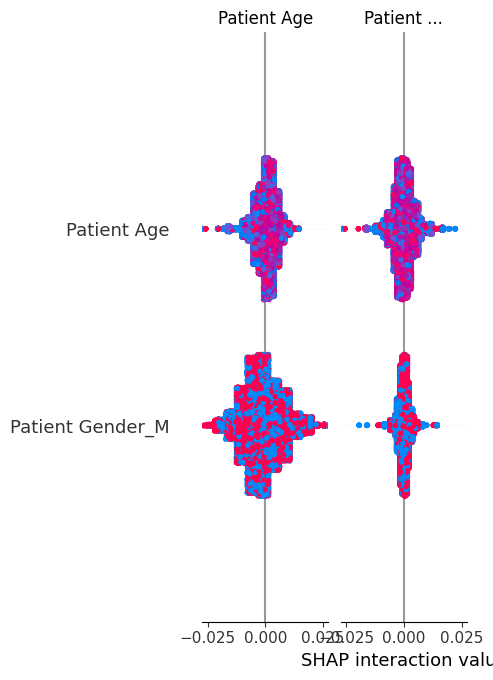

In [ ]:
import shap
import matplotlib.pyplot as plt

# Explain one disease, e.g., Pneumonia
rf_single = RandomForestClassifier(n_estimators=100, random_state=42)
rf_single.fit(X_train, y_train['Pneumonia'])

explainer = shap.TreeExplainer(rf_single)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, feature_names=X.columns)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


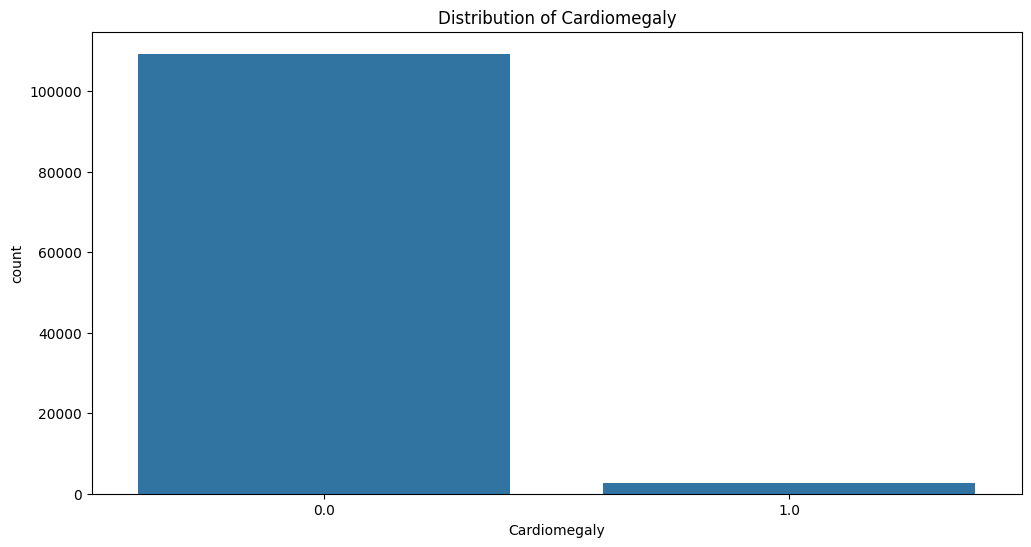

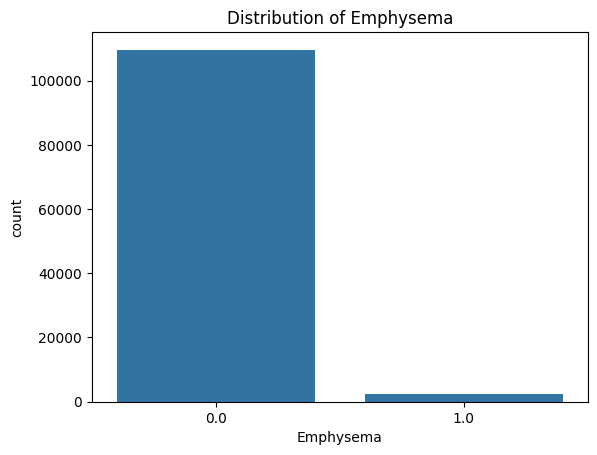

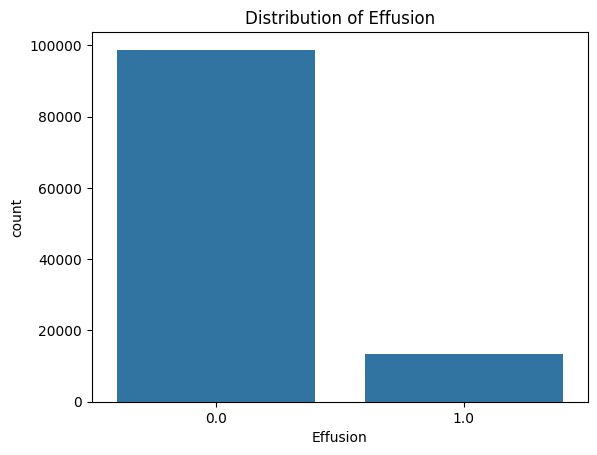

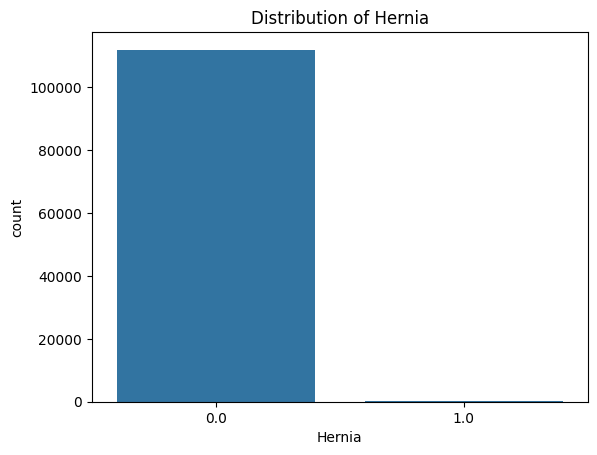

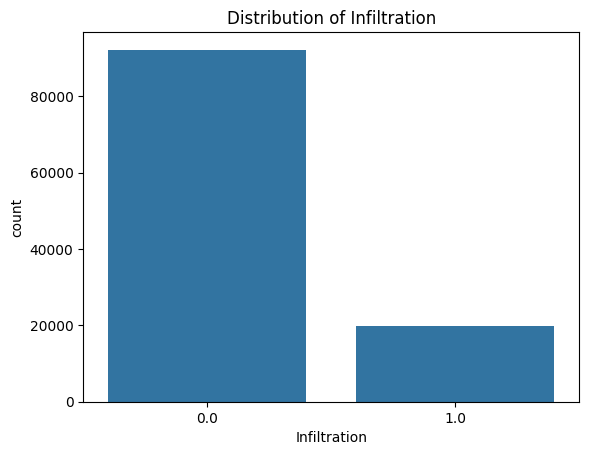

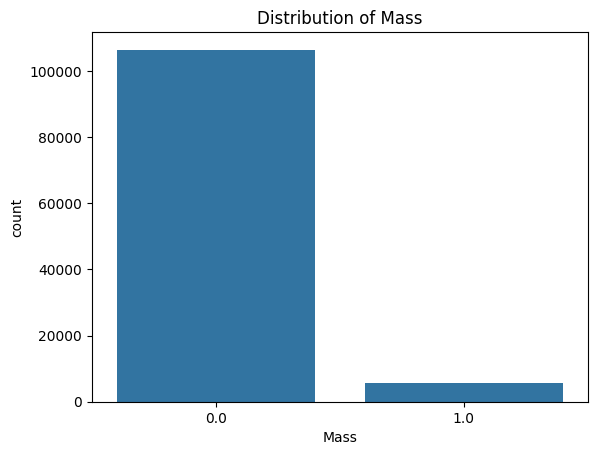

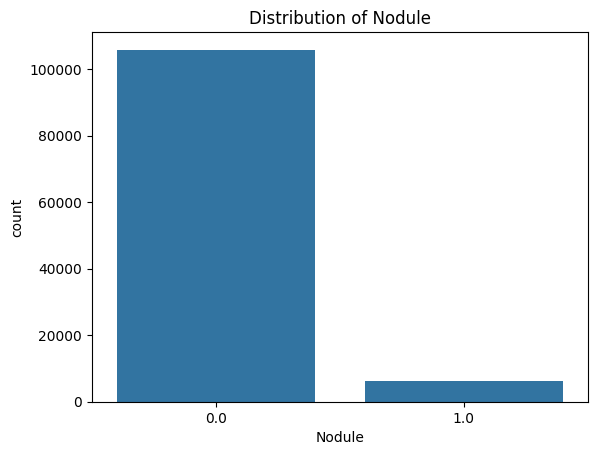

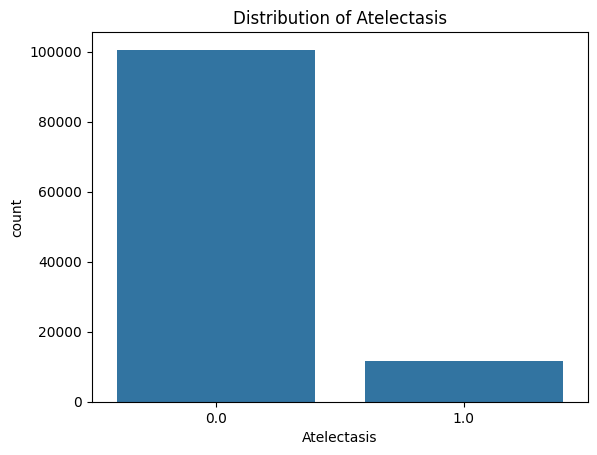

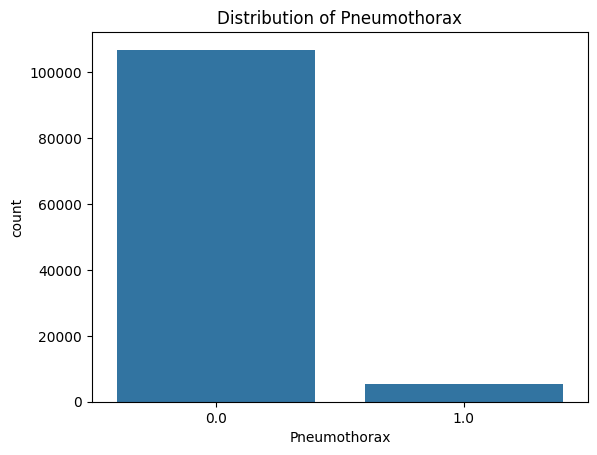

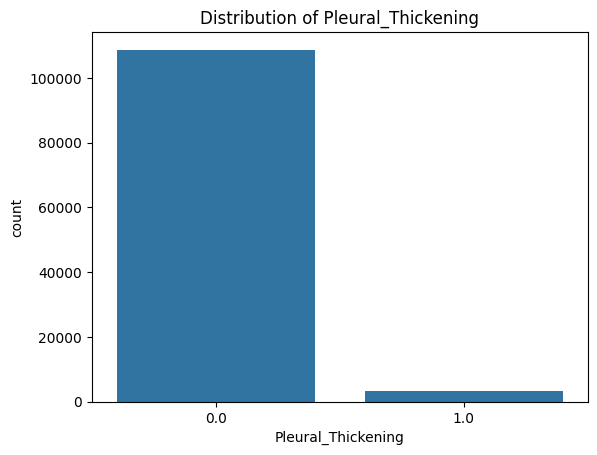

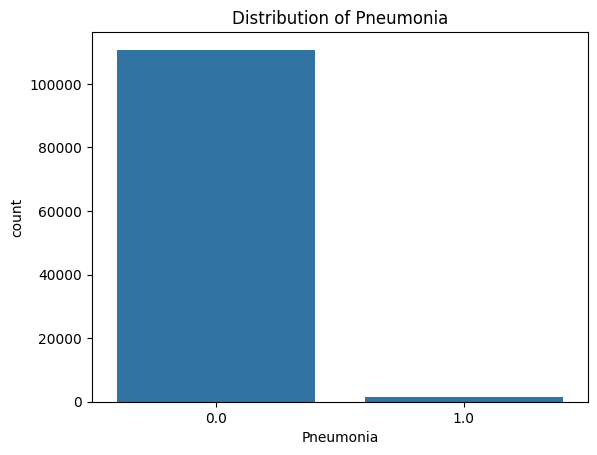

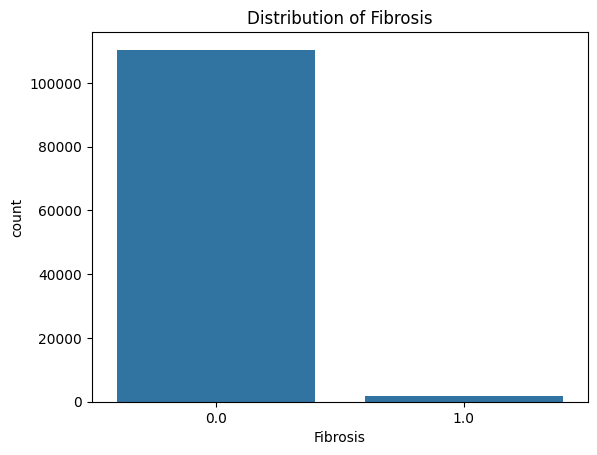

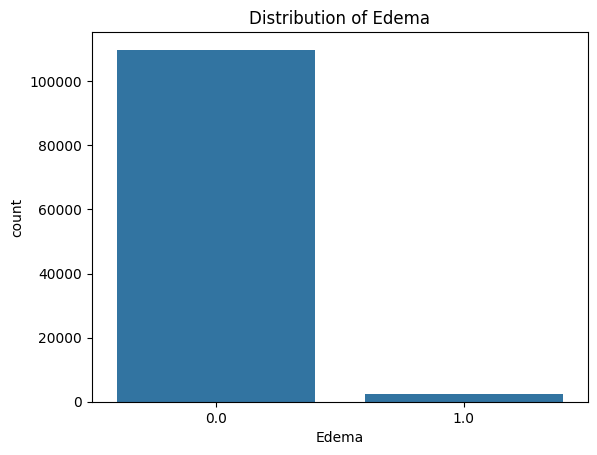

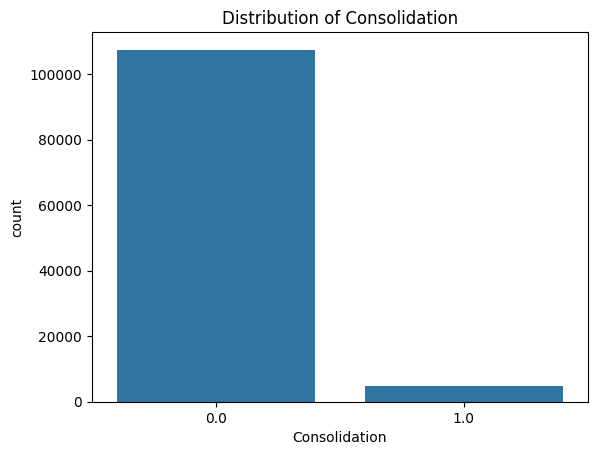

In [ ]:
plt.figure(figsize=(12,6))
for col in target_cols:
    sns.countplot(x=col, data=df)
    plt.title(f"Distribution of {col}")
    plt.show()


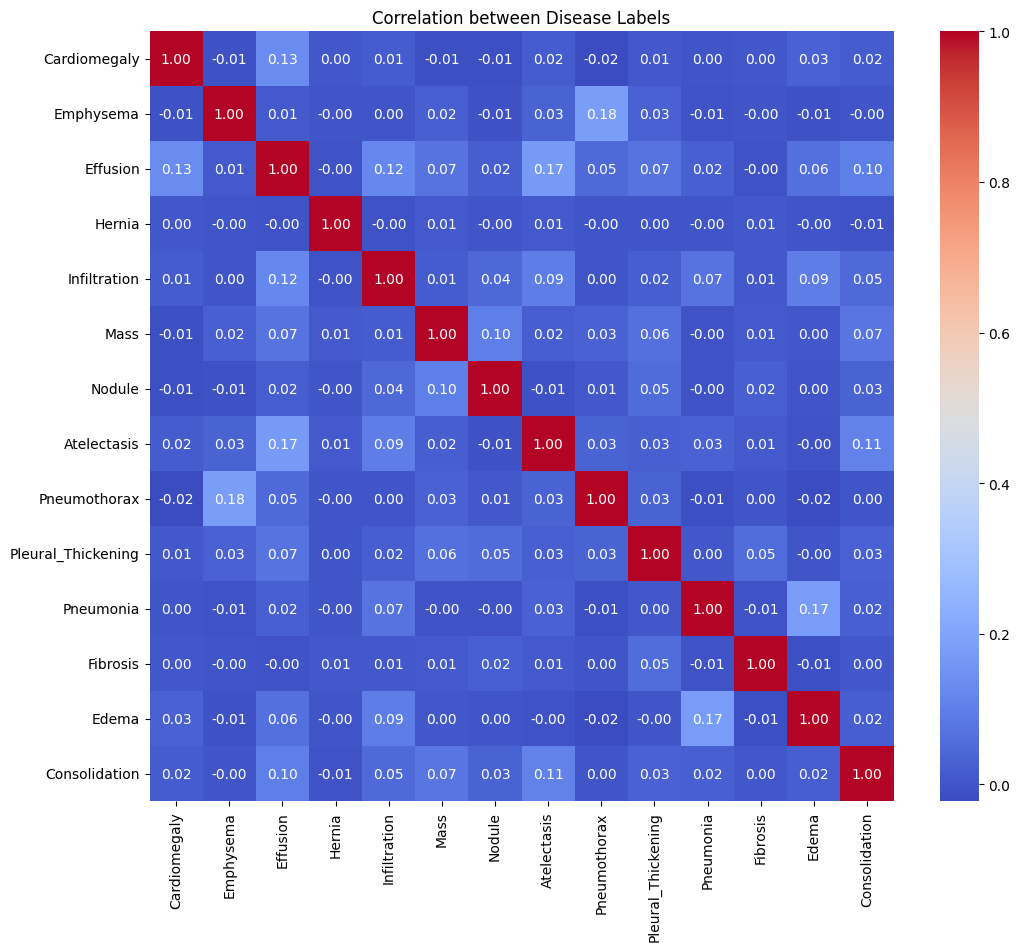

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(y.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between Disease Labels")
plt.show()
